In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [3]:
# 模拟数据生成
teacher_data = {
    'Age': np.random.randint(25, 60, 50),
    'Teaching_Years': np.random.randint(1, 35, 50),
    'Current_System_Satisfaction': np.random.choice(['非常满意', '较为满意', '一般', '不太满意', '非常不满意'], 50, p=[0.1, 0.1, 0.4, 0.35, 0.05]),
    'Importance_of_Intelligent_Test_Generation': np.random.choice(['非常重要', '较为重要', '一般', '不太重要', '完全不重要'], 50, p=[0.5, 0.3, 0.15, 0.05, 0]),
    'Preference_for_Exam_System_Features': [np.random.choice(['题库管理', '题目分类', '智能组卷', '考试安排', '成绩统计', '考试结果分析', '其他'], size=np.random.randint(2, 4), replace=False, p=[0.25, 0.1, 0.25, 0.1, 0.1, 0.1, 0.1]).tolist() for _ in range(50)],
    'Interface_Preference': np.random.choice(['简洁', '丰富', '专业', '其他'], 50, p=[0.4, 0.2, 0.3, 0.1]),
    'Support_Features': [np.random.choice(['在线帮助文档', '实时客服支持', '使用教程视频', '其他'], size=np.random.randint(1, 3), replace=False, p=[0.4, 0.3, 0.2, 0.1]).tolist() for _ in range(50)],
    'Data_Security_Requirement': np.random.choice(['非常高', '较高', '一般', '不太高', '无所谓'], 50, p=[0.5, 0.3, 0.15, 0.05, 0]),
    'Backup_and_Restore': np.random.choice(['是', '否'], 50, p=[0.8, 0.2])
}

student_data = {
    'Age': np.random.randint(18, 25, 100),
    'Preferred_Exam_Method': np.random.choice(['纸质考试', '在线考试', '无所谓'], 100, p=[0.2, 0.6, 0.2]),
    'Importance_of_Exam_System_Features': [np.random.choice(['考试时间提醒', '题目导航', '自动保存答题进度', '成绩查询', '错题回顾', '其他'], size=np.random.randint(2, 5), replace=False, p=[0.1, 0.3, 0.2, 0.3, 0.05, 0.05]).tolist() for _ in range(100)],
    'Interface_Preference': np.random.choice(['简洁', '丰富', '专业', '其他'], 100, p=[0.4, 0.2, 0.3, 0.1]),
    'Support_Features': [np.random.choice(['在线帮助文档', '实时客服支持', '使用教程视频', '其他'], size=np.random.randint(1, 3), replace=False, p=[0.4, 0.3, 0.2, 0.1]).tolist() for _ in range(100)],
    'Data_Security_Requirement': np.random.choice(['非常高', '较高', '一般', '不太高', '无所谓'], 100, p=[0.5, 0.3, 0.15, 0.05, 0]),
    'Backup_and_Restore': np.random.choice(['是', '否'], 100, p=[0.8, 0.2])
}

df_teacher = pd.DataFrame(teacher_data)
df_student = pd.DataFrame(student_data)

In [4]:
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1. 教师对当前考试系统满意度的分布

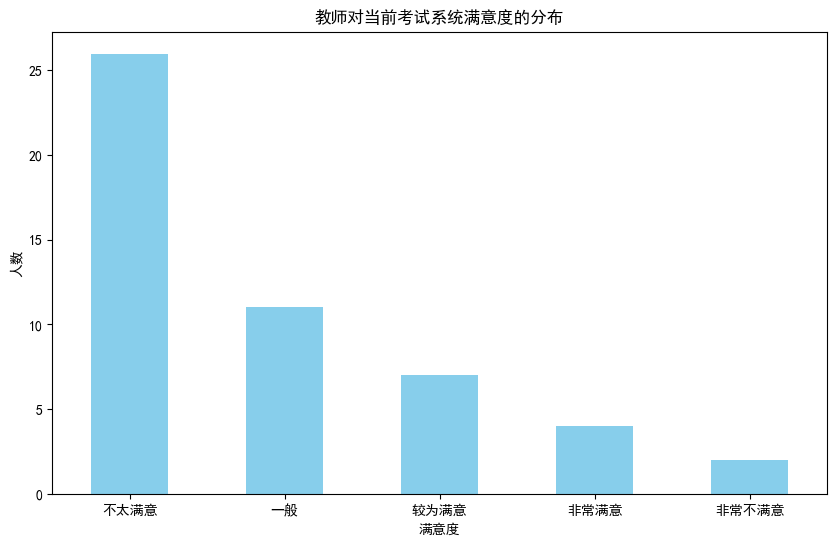

In [13]:
plt.figure(figsize=(10, 6))
df_teacher['Current_System_Satisfaction'].value_counts().plot(kind='bar', color='skyblue')
plt.title('教师对当前考试系统满意度的分布')
plt.xlabel('满意度')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.savefig('res/教师对当前考试系统满意度的分布.png')
plt.show()

## 2. 教师对智能组卷功能重要性的评价

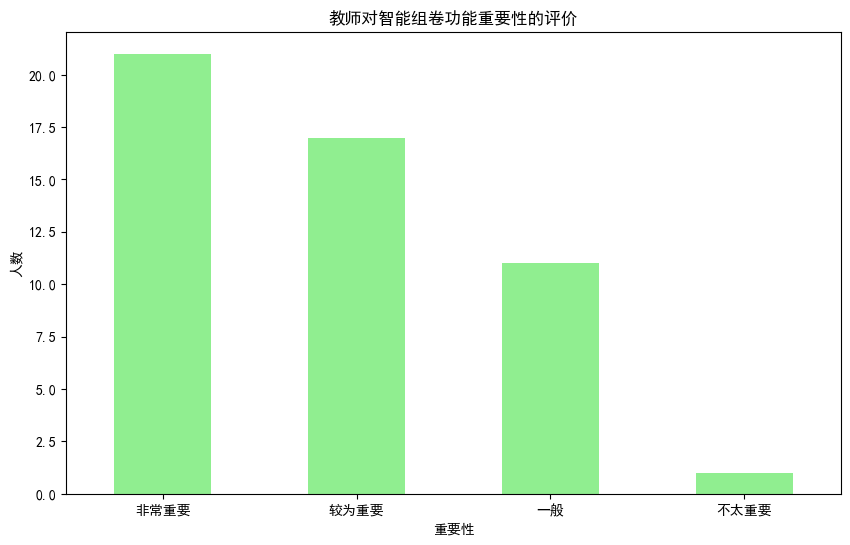

In [7]:
plt.figure(figsize=(10, 6))
df_teacher['Importance_of_Intelligent_Test_Generation'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('教师对智能组卷功能重要性的评价')
plt.xlabel('重要性')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.savefig('res/教师对智能组卷功能重要性的评价.png', bbox_inches='tight')
plt.show()

## 3. 教师对考试系统各功能需求的重要性评价（采用词云展示功能需求）

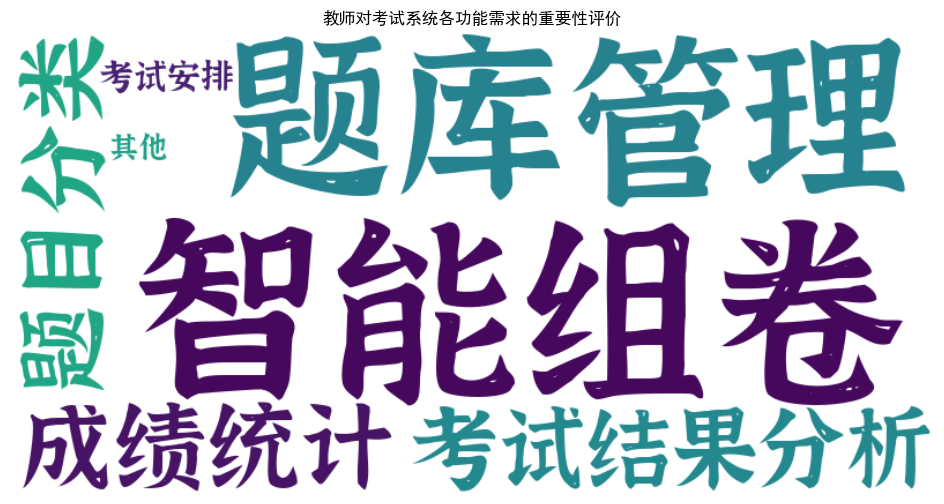

In [8]:
features_flat = [item for sublist in df_teacher['Preference_for_Exam_System_Features'] for item in sublist]
features_count = Counter(features_flat)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='ziti.ttf').generate_from_frequencies(features_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('教师对考试系统各功能需求的重要性评价')
plt.savefig('res/教师对考试系统各功能需求的重要性评价', bbox_inches='tight')
plt.show()

## 4. 教师对系统界面设计偏好的分布

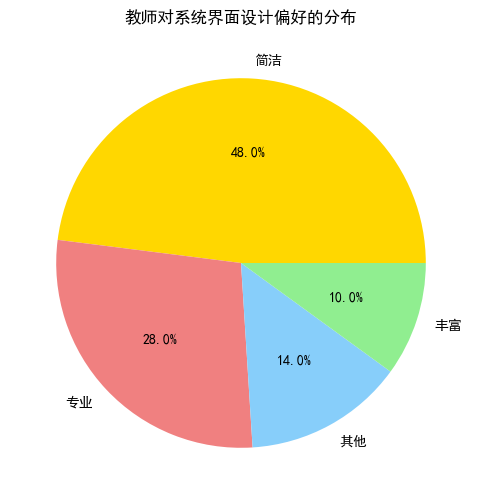

In [9]:
plt.figure(figsize=(10, 6))
df_teacher['Interface_Preference'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('教师对系统界面设计偏好的分布')
plt.ylabel('')
plt.savefig('res/教师对系统界面设计偏好的分布.png', bbox_inches='tight')
plt.show()

## 5. 学生对不同考试方式的偏好

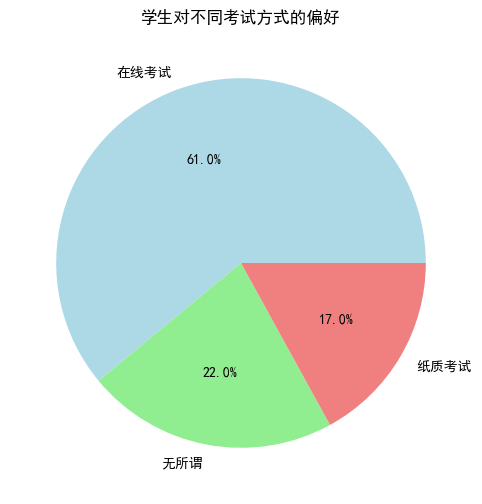

In [10]:
plt.figure(figsize=(10, 6))
df_student['Preferred_Exam_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('学生对不同考试方式的偏好')
plt.ylabel('')
plt.savefig('res/学生对不同考试方式的偏好.png', bbox_inches='tight')
plt.show()

## 6. 学生对考试系统各功能需求的重要性评价（采用词云展示功能需求）

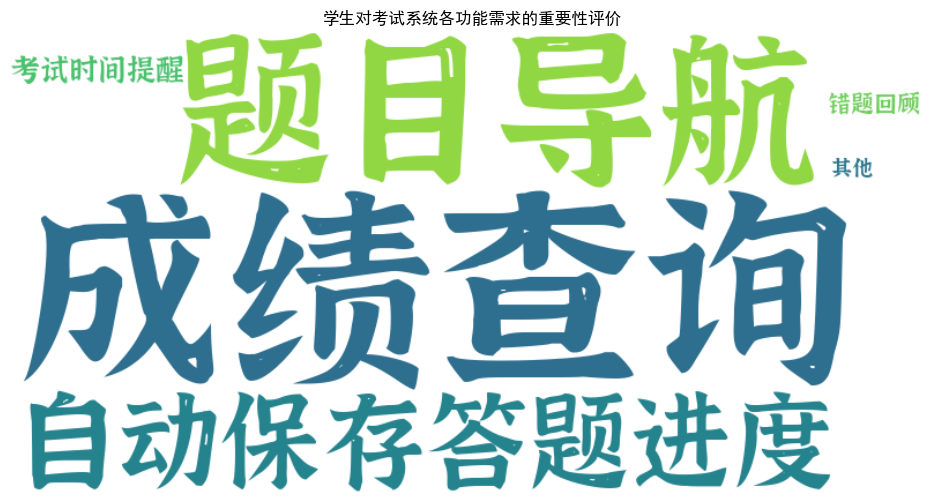

In [11]:
student_features_flat = [item for sublist in df_student['Importance_of_Exam_System_Features'] for item in sublist]
student_features_count = Counter(student_features_flat)

wordcloud_student = WordCloud(width=800, height=400, background_color='white', font_path='ziti.ttf').generate_from_frequencies(student_features_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_student, interpolation='bilinear')
plt.axis('off')
plt.title('学生对考试系统各功能需求的重要性评价')
plt.savefig('res/学生对考试系统各功能需求的重要性评价.png', bbox_inches='tight')
plt.show()

## 7. 学生对系统界面设计偏好的分布

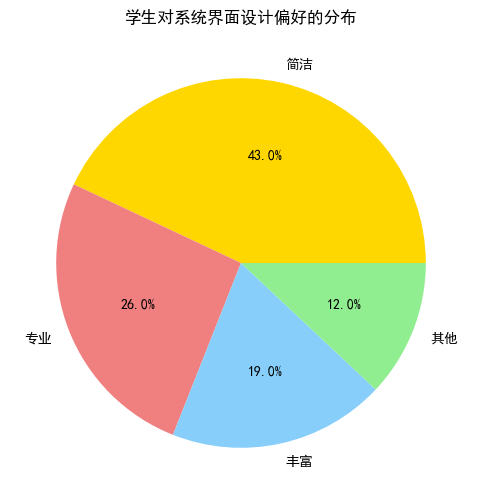

In [12]:
plt.figure(figsize=(10, 6))
df_student['Interface_Preference'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('学生对系统界面设计偏好的分布')
plt.ylabel('')
plt.savefig('res/学生对系统界面设计偏好的分布.png', bbox_inches='tight')
plt.show()